# Data Cleaning Module

### Our second phase entails the data cleaning process.

### Check for Duplicates

In [947]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', 100)

# display plots in the notebook
%matplotlib inline

# load the real estate data
df = pd.read_csv('data_aos_modified.csv')

In [948]:
# Drop duplicates and check on the data frame's shape for differences
df.shape

(6000, 17)

In [949]:
df = df.drop_duplicates()
df.shape

(5786, 17)

### Removing Outliers

#### Objectives
* Check for unlikely to be real datas
* Remove real estates that are too pricey, luxury that pertain to a different category.


In [950]:
#getting rid of ads that didn't put most of their essential information 

df = df.dropna(thresh=df.shape[1] - 3)
df.shape

(5786, 17)

In [951]:
## divide by 1 million to get an easy to work with data
df['үнэ'] = df['үнэ'] / 1e6

In [952]:
df.shape

(5786, 17)

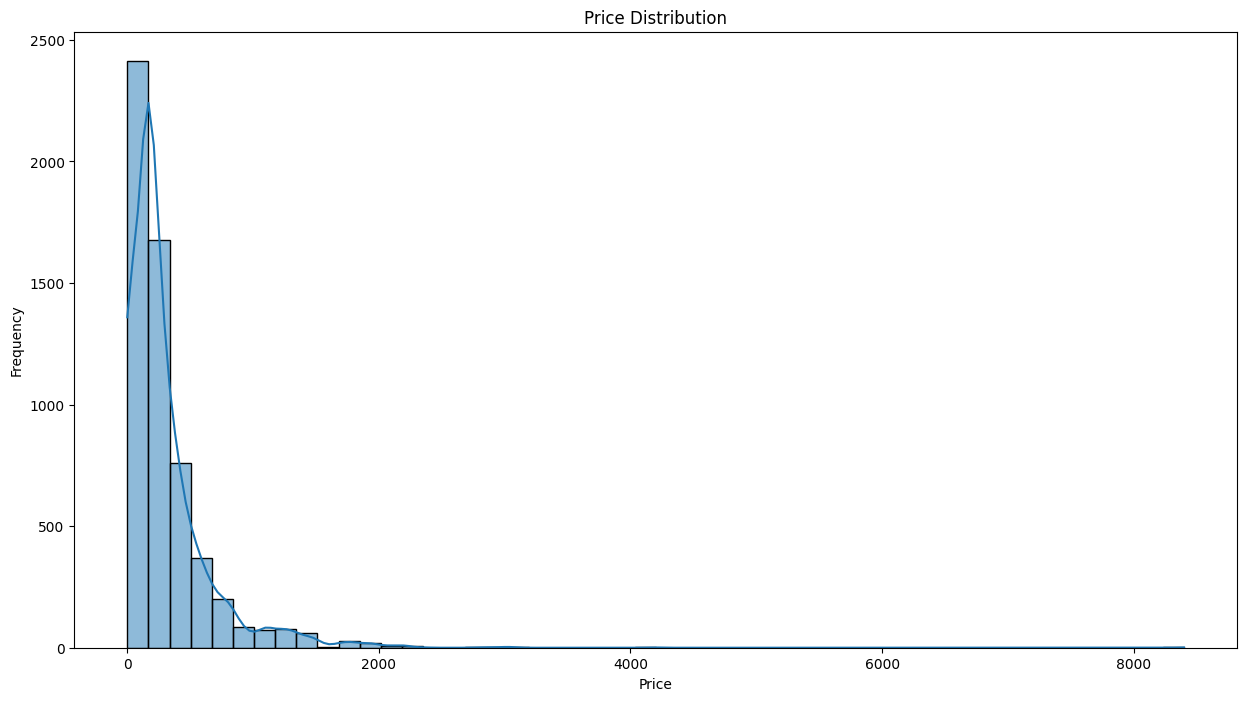

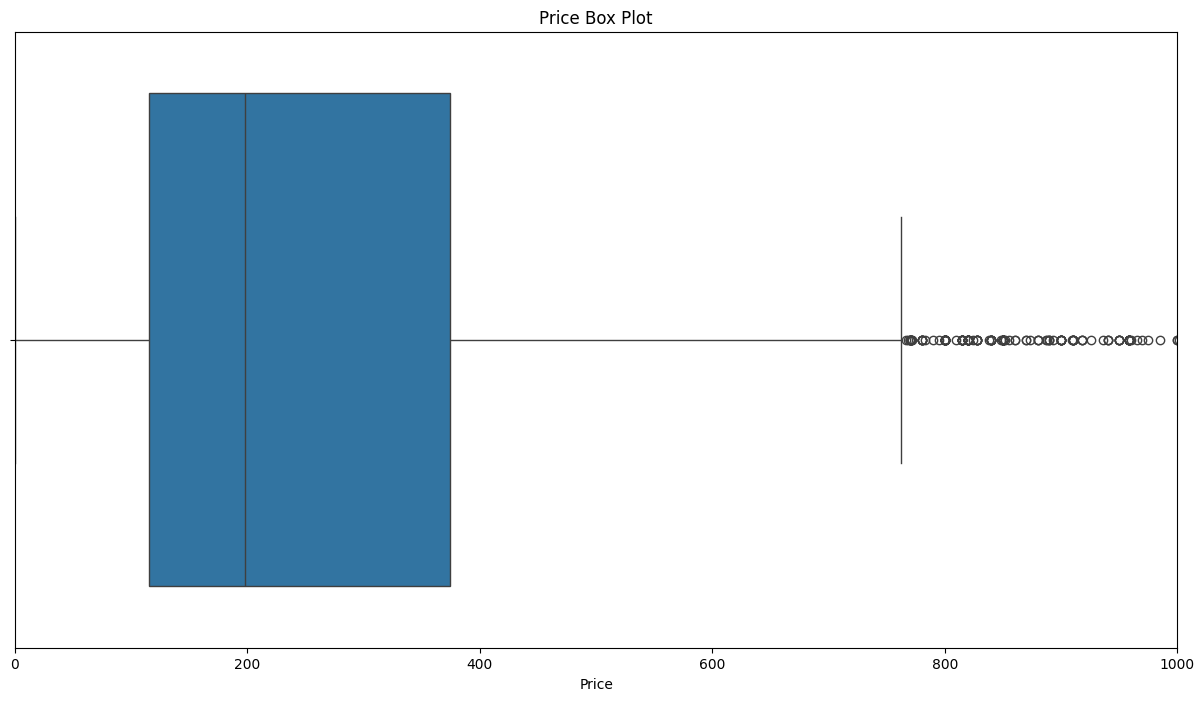

In [953]:

# Histogram for 'price'
plt.figure(figsize=(15, 8))
sns.histplot(df['үнэ'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['үнэ'])
plt.xlim(0, 1000) 
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


In [954]:
df['үнэ'].describe()

count    5786.000000
mean      299.931957
std       355.406218
min         0.000400
25%       115.000000
50%       198.000000
75%       373.912500
max      8400.000000
Name: үнэ, dtype: float64

In [955]:
sd = df[df['үнэ'] <= 1]
sd

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
178,0.0004,"УБ — Сүхбаатар, Сүхбаатар, Хороо 5",Цемент,2 тагттай,2009,Байгаа,Мод,6,Бүргэд,99.0 м²,5,Лизинггүй,4,Ашиглалтад орсон,NaN,NaN,NaN


In [956]:
df = df[df['үнэ'] >= 1]

In [957]:
### getting rid of unnecessary words
df['Талбай:'] = df['Талбай:'].str.replace('м²', '').str.strip()
df['Талбай:'] = pd.to_numeric(df['Талбай:'], errors='coerce')


In [958]:
# Replace price with price times area if price / area < 1
condition = df['үнэ'] / df['Талбай:'] < 1
df.loc[condition, 'үнэ'] = df.loc[condition, 'үнэ'] * df.loc[condition, 'Талбай:']
df['үнэ'].describe()


count    5785.000000
mean      373.171860
std       361.625311
min         3.100000
25%       163.000000
50%       250.000000
75%       450.000000
max      8400.000000
Name: үнэ, dtype: float64

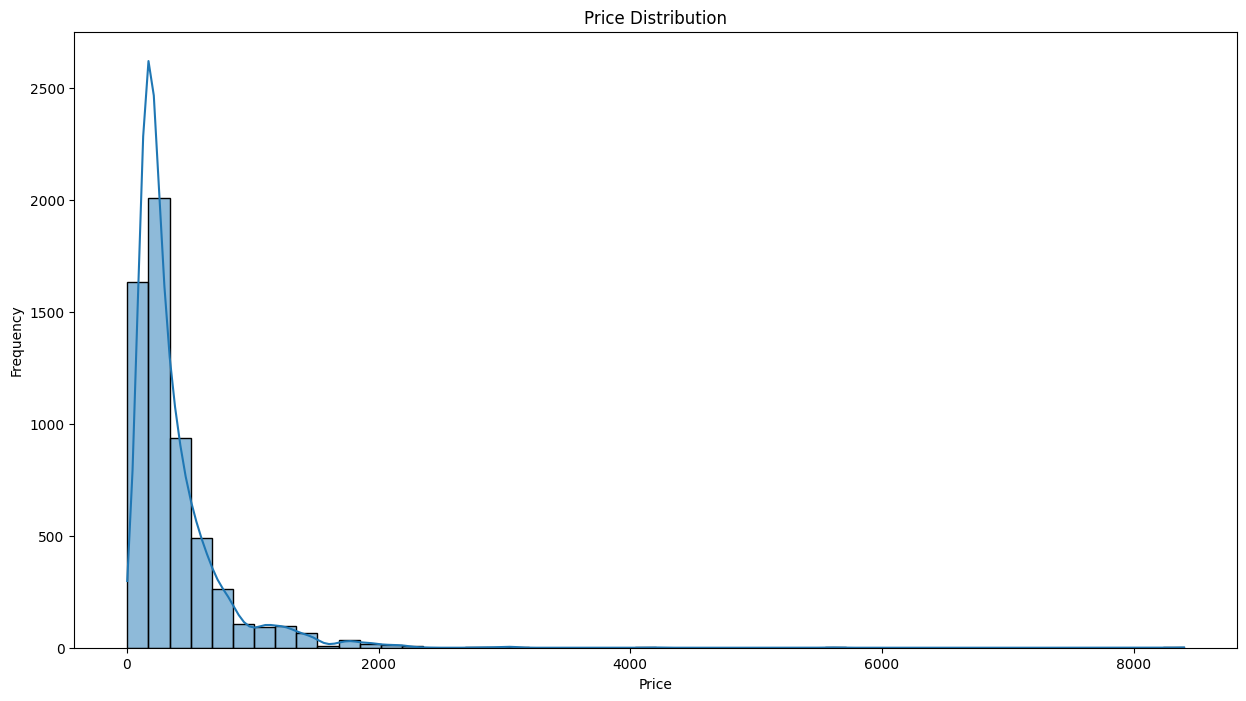

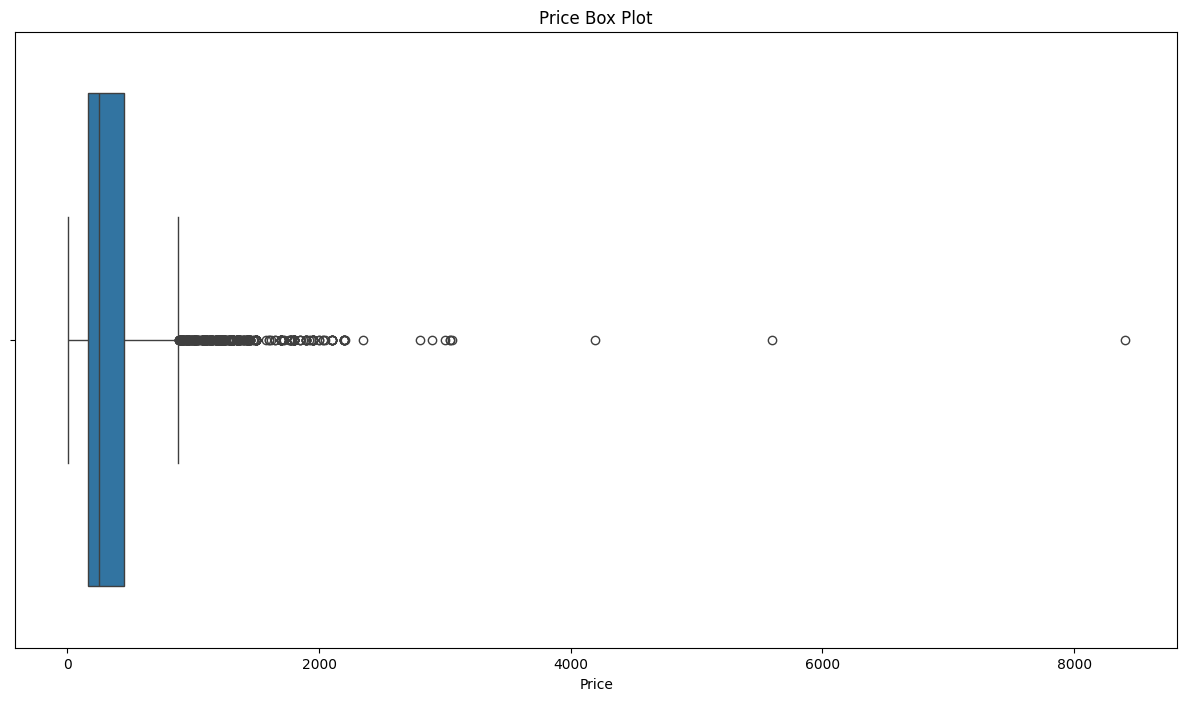

In [959]:

# Histogram for 'price'
plt.figure(figsize=(15, 8))
sns.histplot(df['үнэ'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['үнэ'])
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


In [960]:
iqr = 450 - 163

upper_bound = 450 + 1.5 * iqr
print('upper bound is', upper_bound)

upper bound is 880.5


In [961]:

outlier_count = (df['үнэ'] >= upper_bound).sum()
outlier_count

415

In [962]:
wo = df[df['үнэ'] <= upper_bound]
wo['үнэ'].describe()

count    5370.000000
mean      296.516268
std       183.188004
min         3.100000
25%       160.000000
50%       235.000000
75%       388.082500
max       880.000000
Name: үнэ, dtype: float64

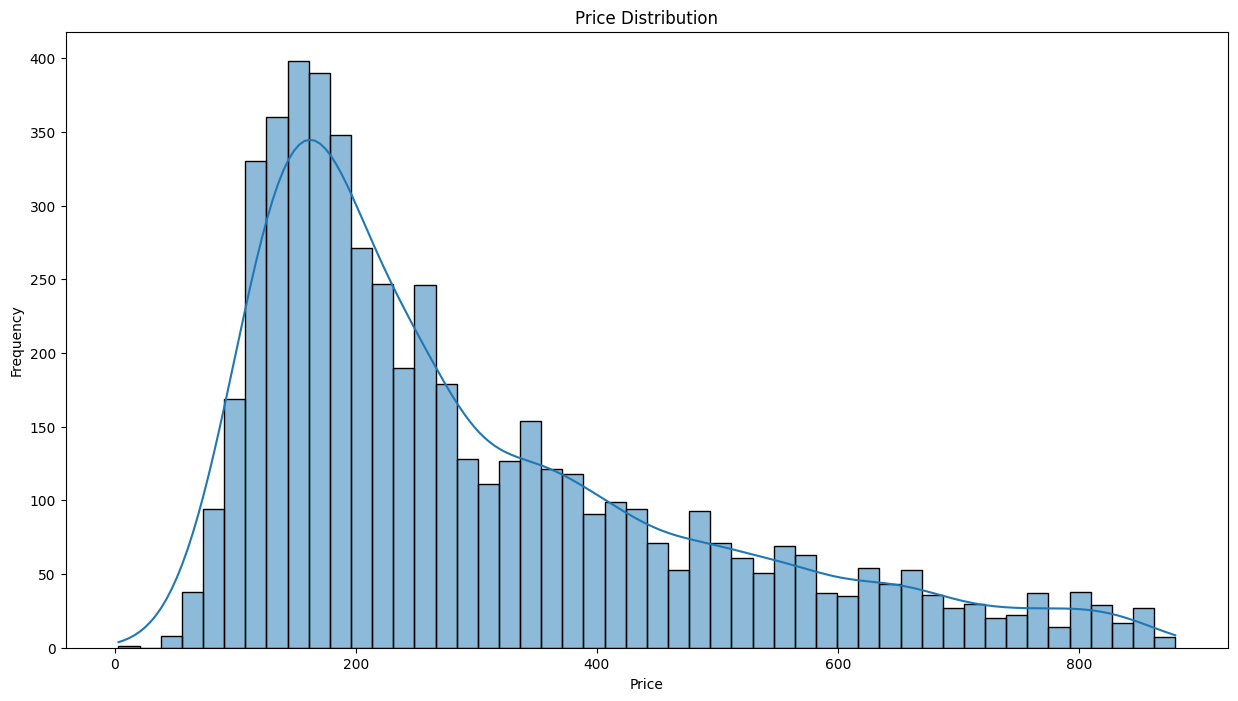

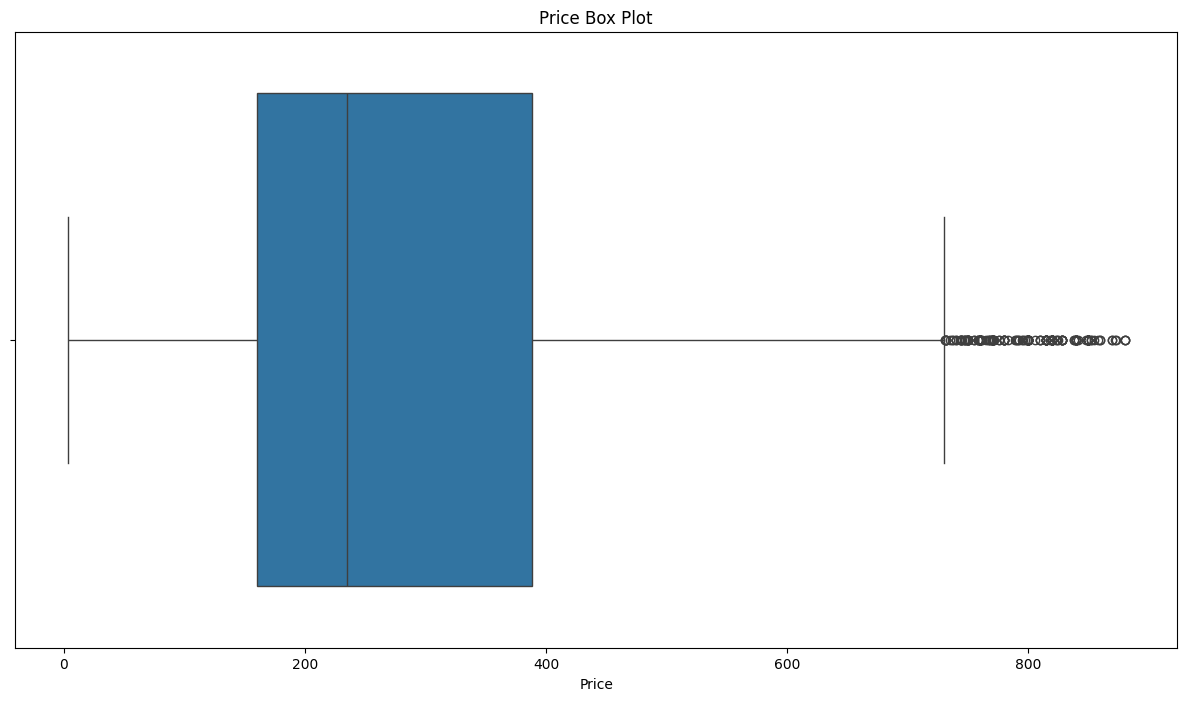

In [963]:

# Histogram for 'price'
plt.figure(figsize=(15, 8))
sns.histplot(wo['үнэ'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(15, 8))
sns.boxplot(x=wo['үнэ'])
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


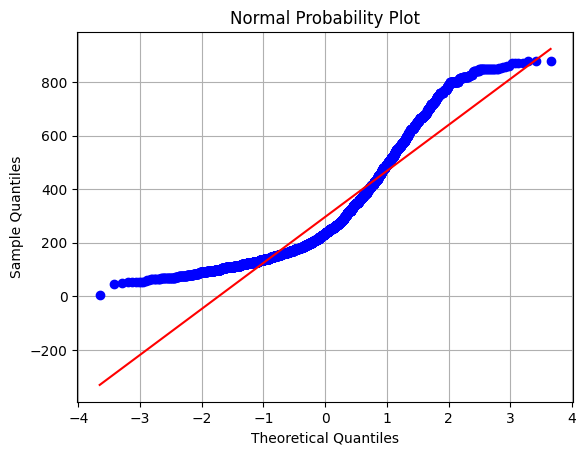

In [964]:
from scipy.stats import probplot

# Create the normal probability plot
target_data = wo['үнэ']
probplot(target_data, plot=plt)

# Show the plot
plt.title("Normal Probability Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

In [965]:
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,Тагтгүй,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1 тагттай,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,Тагтгүй,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2 тагттай,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


In [966]:
# To count different values of floor
s = df['Шал:'].value_counts()
s

Шал:
Паркет     5581
Ламинат      82
Мод          75
Цемент       26
Плита        16
Чулуу         5
Name: count, dtype: int64

In [967]:
# To count different values of address
sda = wo['хаяг'].value_counts()
sda

хаяг
УБ — Хан-Уул, Яармаг                       511
УБ — Хан-Уул, Зайсан                       366
УБ — Баянзүрх, Баянзүрх, Хороо 26          306
УБ — Хан-Уул, Нисэх                        176
УБ — Хан-Уул, Хан-Уул, Хороо 15            147
                                          ... 
УБ — Баянгол, Баянгол, Хороо 14              1
УБ — Баянзүрх, 84-р сургуулийн ойролцоо      1
УБ — Баянзүрх, Баянзүрх, Хороо 20            1
УБ — Баянзүрх, 2-р эмнэлэг                   1
УБ — Сонгинохайрхан, Толгойт                 1
Name: count, Length: 265, dtype: int64

In [968]:
# To count different values of windows
sda = wo['Цонх:'].value_counts()
sda

Цонх:
Вакум          5176
Төмөр вакум     116
Модон вакум      47
Мод              31
Name: count, dtype: int64

### Structural Errors

* Replace any null variables to zero if applicable
* Fix any typos and capitalization errors 

In [969]:
#replace NaN values with 0 for garage
wo['Гараж:'] = wo['Гараж:'].fillna(0)
wo.head()

/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_21622/4115155570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo['Гараж:'] = wo['Гараж:'].fillna(0)


,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,Тагтгүй,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1 тагттай,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,Тагтгүй,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2 тагттай,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


In [970]:

#getting rid of unnecessary texts and also places outside ub 
df = df[df['хаяг'].str.startswith('УБ')]
df['хаяг'] = df['хаяг'].str.replace('УБ —', '').str.strip()
df.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"Хан-Уул, Viva city",Паркет,Тагтгүй,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"Хан-Уул, 19-р хороолол",Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"Баянзүрх, Чингис зочид буудал",Паркет,1 тагттай,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"Хан-Уул, Хан-Уул, Хороо 16",Паркет,Тагтгүй,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"Баянзүрх, Баянзүрх, Хороо 26",Паркет,2 тагттай,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


In [971]:
wo.shape

(5370, 17)

In [972]:
#getting rid of unnecessary words
wo['Тагт:'] = wo['Тагт:'].fillna('0')
wo['Тагт:'] = wo['Тагт:'].str.replace('тагттай', '').str.strip()
wo['Тагт:'] = wo['Тагт:'].str.replace('Тагтгүй', '0').str.strip()
wo['Тагт:'] = wo['Тагт:'].str.replace('3+', '3').str.strip()
wo['Талбай:'] = pd.to_numeric(wo['Талбай:'], errors='coerce')

df.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"Хан-Уул, Viva city",Паркет,Тагтгүй,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"Хан-Уул, 19-р хороолол",Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"Баянзүрх, Чингис зочид буудал",Паркет,1 тагттай,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"Хан-Уул, Хан-Уул, Хороо 16",Паркет,Тагтгүй,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"Баянзүрх, Баянзүрх, Хороо 26",Паркет,2 тагттай,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


In [973]:
#checking if they have been removed correctly 
count = wo['Тагт:'].value_counts()
count

Тагт:
1    4214
2     670
0     429
3      57
Name: count, dtype: int64

In [974]:
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,0,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,0,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


# Label Encoding

* Binary classifying for features that have either true or false value.

In [975]:
#mapping values 

mapping = {
    'Банкны лизингтэй': '1',
    'Лизинггүй' : '0',
    'Хувь лизингтэй' : '1'
}
garagemap = {
    'Байхгүй' : '0',
    'Байгаа' : '1',
}
usagemap = {
    'Ашиглалтад орсон' : '1',
    'Ашиглалтад ороогүй': '0',
}
wo['Гараж:'] = wo['Гараж:'].str.strip()
wo['Гараж:'] = wo['Гараж:'].map(garagemap)

wo['Лизингээр авах боломж:'] = wo['Лизингээр авах боломж:'].str.strip()
wo['Лизингээр авах боломж:'] = wo['Лизингээр авах боломж:'].map(mapping)

wo['Барилгын явц:'] = wo['Барилгын явц:'].str.strip()
wo['Барилгын явц:'] = wo['Барилгын явц:'].map(usagemap)


wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,0,2013,0,Вакум,5,Бүргэд,30.50,5,0,2,1,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1,1990,0,Вакум,5,Бүргэд,16.00,5,0,2,1,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1,2010,0,Вакум,10,Бүргэд,150.00,10,0,5,1,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,0,2021,0,Вакум,12,Вакум,39.98,2,0,2,1,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2,2016,1,Вакум,16,Бүргэд,115.86,7,0,5,1,NaN,NaN,NaN


In [976]:
wo.shape

(5370, 17)

In [977]:
wo.isnull().sum()

үнэ                          0
хаяг                         0
Шал:                         0
Тагт:                        0
Ашиглалтанд орсон он:        0
Гараж:                       0
Цонх:                        0
Барилгын давхар:             0
Хаалга:                      0
Талбай:                      0
Хэдэн давхарт:               0
Лизингээр авах боломж:       0
Цонхны тоо:                  0
Барилгын явц:                0
Байршил:                  5369
Код:                      5370
location:                 5369
dtype: int64

In [978]:
wo = wo.drop(columns= ['Байршил:', 'Код:', 'location:'])
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,0,2013,0,Вакум,5,Бүргэд,30.50,5,0,2,1
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1,1990,0,Вакум,5,Бүргэд,16.00,5,0,2,1
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1,2010,0,Вакум,10,Бүргэд,150.00,10,0,5,1
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,0,2021,0,Вакум,12,Вакум,39.98,2,0,2,1
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2,2016,1,Вакум,16,Бүргэд,115.86,7,0,5,1


# Import the cleaned data to a new csv.

In [979]:
wo.to_csv('cleaned_data.csv', index=False)